In [3]:
#Beer Consumption Prediction
!wget https://www.dropbox.com/s/9tmnvhivvq4oyc7/Consumo_cerveja.csv

--2020-10-11 17:15:28--  https://www.dropbox.com/s/9tmnvhivvq4oyc7/Consumo_cerveja.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9tmnvhivvq4oyc7/Consumo_cerveja.csv [following]
--2020-10-11 17:15:29--  https://www.dropbox.com/s/raw/9tmnvhivvq4oyc7/Consumo_cerveja.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5a5355ce9520fe704cbba8719.dl.dropboxusercontent.com/cd/0/inline/BBCEhpWbYXDScNIcZZ12ZP4qlp9urHvEbhk7sbp_iSubaXbfr_rEYLHSL0gYXY6DGHXdTl4OZRyeHkDHt2c7SvIlszTtSyC28tLEGO4pcHYLqbikAWvqs-sjR3w3JyNJJB8/file# [following]
--2020-10-11 17:15:29--  https://ucb5a5355ce9520fe704cbba8719.dl.dropboxusercontent.com/cd/0/inline/BBCEhpWbYXDScNIcZZ12ZP4qlp9urHvEbhk7sbp_iSubaXbfr_rEYLHSL0gYXY6DGHXdTl4OZRyeHkDHt2c7SvIlsz

In [1]:
'''Load and analyse the dataset
Have a look at the first five rows
Perform pandas profiling and observe the columns
Check the shpe of the dataset
''' 
import pandas as pd
df1 = pd.read_csv('content/Consumo_cerveja.csv', parse_dates=['Data'])

In [2]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=4cc83775ffb75c3f16184d96325736c414404bf31f06ec43de42d15b4064135d
  Stored in directory: /tmp/pip-ephem-wheel-cache-8r84rrjq/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title="Pandas Profilling Report")
profile.to_file("your_report.html")

/home/ubuntu/python_virtenv/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2833: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


In [4]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [5]:
# Rectify the data
# Replace ',' with '.'
df1['Temperatura Media (C)'] = df1['Temperatura Media (C)'].str.replace(',', '.')
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].str.replace(',', '.')
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].str.replace(',','.')

In [6]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [7]:
# Create new feature/column 'Month', 'Day' from the dates
# Set values from 'Date' column as indexes
df1['Month'] = df1.Data.dt.month
df1['Day'] = df1.Data.dt.dayofweek
df1.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
335,2015-12-02,22.1,18.2,29.4,0,0.0,30.471,12.0,2.0
336,2015-12-03,22.44,20.2,26.1,0,0.0,28.405,12.0,3.0
337,2015-12-04,22.76,19,29.1,0,0.0,29.513,12.0,4.0
338,2015-12-05,24.8,19.5,30.6,0.1,1.0,32.451,12.0,5.0
339,2015-12-06,23.12,20.6,28,0.1,1.0,32.780,12.0,6.0
340,2015-12-07,20.04,18,23.9,47.8,0.0,23.375,12.0,0.0


In [8]:
''' Handle null values
    Only drop those instances where all values are null
    Check the duplicate values
'''
print(df1.isnull().sum())
print(df1.shape)

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
Month                          576
Day                            576
dtype: int64
(941, 9)


In [9]:
print(df1.isnull().all(axis=1).sum())

576


In [10]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1.0,3.0
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1.0,4.0
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1.0,5.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,1.0,0.0


In [11]:
df1.dropna(how='all', inplace=True)

In [12]:
df1.shape

(365, 9)

In [13]:
print(df1.isnull().sum())

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64


In [14]:
if df1.duplicated().any():
    print('True: duplicate instances')
else:
    print('False: No duplicate instances')

False: No duplicate instances


In [15]:
# Handle data types of each features
# Check data-types of the features
# Convert them to appropriate data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   Month                        365 non-null    float64       
 8   Day                          365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 28.5+ KB


In [16]:
df1['Temperatura Media (C)'] = df1[['Temperatura Media (C)']].astype(float)
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].astype(float)# Final de semana is a categorical column(like yes or no) so it should be int, not float
df1['Final de Semana'] = df1['Final de Semana'].astype(int)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    int64         
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   Month                        365 non-null    float64       
 8   Day                          365 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 28.5 KB


In [18]:
df1.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


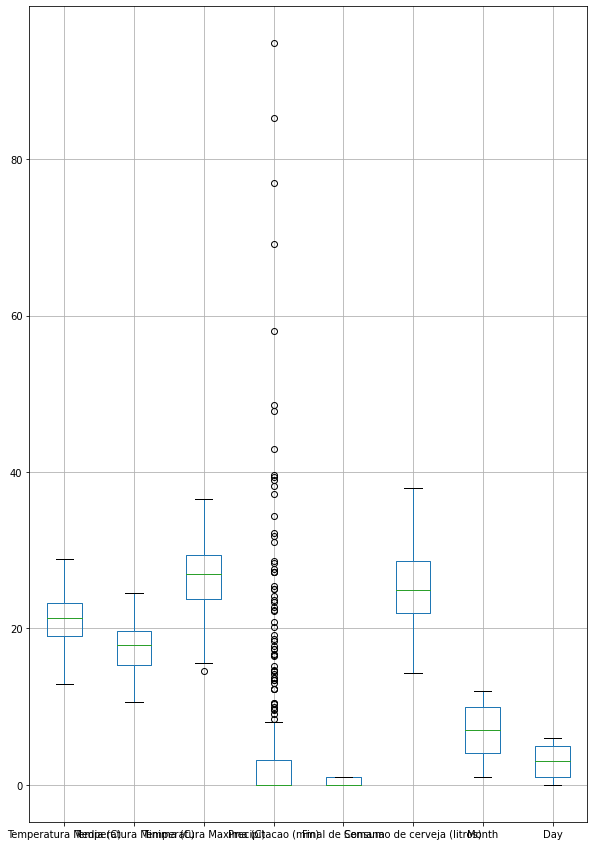

In [19]:
# Handle outlier data
# Check for outlier in all the columns using boxplot
# Analyze the column with outliers
import matplotlib.pyplot as plt
df1.boxplot(figsize=(10, 15))
plt.show()

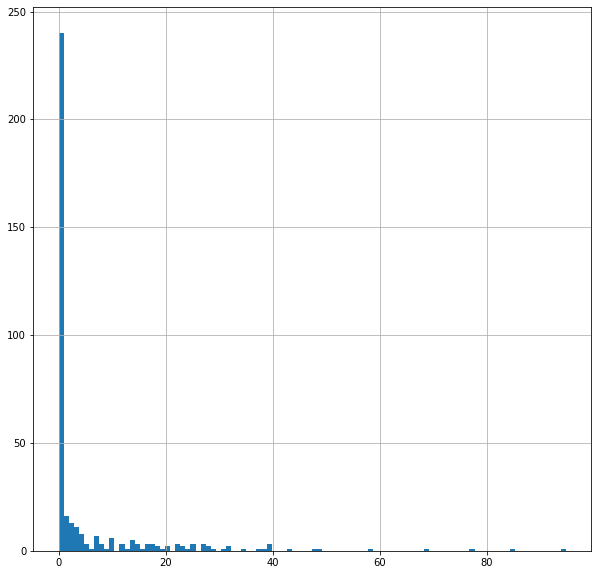

In [20]:
df1['Precipitacao (mm)'].hist(bins=100, figsize=(10, 10))
plt.show()

In [21]:
import numpy as np
print(df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts())

0.0    218
Name: Precipitacao (mm), dtype: int64


In [22]:
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'], 0, 40)

<AxesSubplot:>

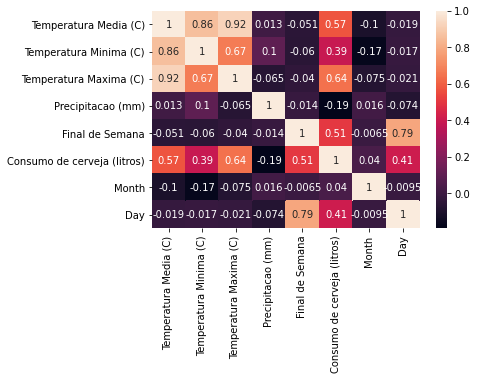

In [23]:
import seaborn as sns
correlation = df1.corr()
sns.heatmap(correlation, annot=True)

In [28]:
''' Split the data into training and testing datasets
    with 20% for testing with random state=7
'''
from sklearn.model_selection import train_test_split
X= df1.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y= df1['Consumo de cerveja (litros)']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 8)
(73, 8)
(292,)
(73,)


In [29]:
# Train the model
# Train a linear regression model for prediction
# Also print the coefficients and intercept from the trained model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

TypeError: invalid type promotion

In [30]:
# Evaluate the model
# Predict the consumption for the test data
# Evaluate the model using R2 score
# Evalue the model using Mean Absolute Error
# Evaluate the model using Root Mean Squared Error
